Assignment On Logistic Regression:

By - Madhusudan Chandak

Vectorization:

-> BOW

-> TFIDF

-> AVG W2V

-> TFIDF W2V

In [1]:
#importing libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
import sqlite3
import nltk
import string
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pickle
from sklearn.decomposition import TruncatedSVD
from tqdm import tqdm_notebook as tqdm
import os
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import wordcloud
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import math
from scipy import sparse

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Loading preprocessed dataset
if os.path.isfile('final.sqlite'):
    conn = sqlite3.connect('final.sqlite')
    final = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score !=3 limit 80000""", conn)
    conn.close()
else:
    print("Please the above cell")
    
final.sort_values('Time')
#print (final.sort_values('Time'))

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
30,138683,150501,0006641040,AJ46FKXOVC7NR,Nicholas A Mesiano,2,2,positive,940809600,This whole series is great way to spend time w...,I can remember seeing the show when it aired o...,rememb see show air televis year ago child sis...
424,417839,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,positive,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,beetlejuic well written movi everyth excel act...
330,346055,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,positive,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",twist rumplestiskin captur film star michael k...
423,417838,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,positive,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...
245,346116,374422,B00004CI84,A1048CYU0OV4O8,Judy L. Eans,2,2,positive,947376000,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,one movi movi collect fill comedi action whate...
308,346041,374343,B00004CI84,A1B2IZU1JLZA6,Wes,19,23,negative,948240000,WARNING: CLAMSHELL EDITION IS EDITED TV VERSION,"I, myself always enjoyed this movie, it's very...",alway enjoy movi funni entertain didnt hesit p...
215,70688,76882,B00002N8SM,A32DW342WBJ6BX,Buttersugar,0,0,positive,948672000,A sure death for flies,I bought a few of these after my apartment was...,bought apart infest fruit fli hour trap mani f...
261,346141,374450,B00004CI84,ACJR7EQF9S6FP,Jeremy Robertson,2,3,positive,951523200,Bettlejuice...Bettlejuice...BETTLEJUICE!,What happens when you say his name three times...,happen say name three time michael keaten star...
325,346094,374400,B00004CI84,A2DEE7F9XKP3ZR,jerome,0,3,positive,959990400,Research - Beatlejuice video - French version,I'm getting crazy.I'm looking for Beatlejuice ...,get crazi look beatlejuic french version video...


In [3]:
print (final.shape)

(80000, 12)


In [6]:
print(final['CleanedText'].values)

['witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg'
 'grew read sendak book watch realli rosi movi incorpor love son love howev miss hard cover version paperback seem kind flimsi take two hand keep page open'
 'fun way children learn month year learn poem throughout school year like handmot invent poem'
 ...
 'found small can local kroger like small much better deal tasti snack'
 'love snack tasti also qualiti realli good get yummi snack'
 'asian rice cracker mix basic one greater varieti cracker also quit bit larger use one size big gumbal perhap reason instead packag bag cracker simpli burst flavor scare eat whole singl sit']


In [7]:
#Pretty Table
x = PrettyTable(["Vectorizer/Featurization","Model","C","Accuracy","ROC Score"])
print(x)

+--------------------------+-------+---+----------+-----------+
| Vectorizer/Featurization | Model | C | Accuracy | ROC Score |
+--------------------------+-------+---+----------+-----------+
+--------------------------+-------+---+----------+-----------+


### Logistic Regression with BAG OF WORDS 

In [52]:
#Using BOW to vectorize

trainX_data=final['CleanedText'].values[0:51200]
testX_data= final['CleanedText'].values[64000:]
cvX_data=final['CleanedText'].values[51200:64000]
trainY_data=final['Score'].values[0:51200]
testY_data=final['Score'].values[64000:]
cvY_data=final['Score'].values[51200:64000]


#Vectorising train data
count_vect = CountVectorizer()
final_counts_train = count_vect.fit_transform(trainX_data)

feature=count_vect.get_feature_names()

#Vectorising cross validation data
final_counts_cv=count_vect.transform(cvX_data)

#Vectorising test data
final_counts_test=count_vect.transform(testX_data)


In [53]:
X_train=final_counts_train
X_test =final_counts_test
X_cv=final_counts_cv
y_train=trainY_data
y_test=testY_data
y_cv=cvY_data

In [54]:
z = {'positive': 1, 'negative': 0}
y_train = pd.Series(y_train)
y_cv = pd.Series(y_cv)
y_test = pd.Series(y_test)
y_train=y_train.map(z)
y_cv = y_cv.map(z)
y_test = y_test.map(z)

In [55]:
#Hyperparameter range
clist=[0.001, 0.01, 0.1, 1, 10, 100, 1000]



 CV accuracy for c = 0.001000 is 86.968750%

 CV accuracy for c = 0.010000 is 90.523438%

 CV accuracy for c = 0.100000 is 91.718750%

 CV accuracy for c = 1.000000 is 91.898438%

 CV accuracy for c = 10.000000 is 91.273438%

 CV accuracy for c = 100.000000 is 91.125000%

 CV accuracy for c = 1000.000000 is 91.078125%


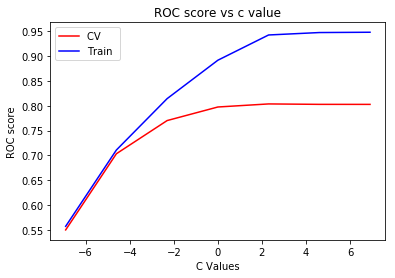

In [56]:
#Running Logistic Regression
c = 0
roc_sc = 0.0
roc_list_cv = []
roc_list_train = []
for i in clist:
    clf = LogisticRegression(random_state=0,penalty='l2',C=i)
    clf.fit(X_train, y_train)
    pred_train = clf.predict(X_train)
    pred_cv = clf.predict(X_cv)
    roc_score_train = roc_auc_score(y_train,pred_train)
    roc_score_cv = roc_auc_score(y_cv, pred_cv)
    roc_list_cv.append(roc_score_cv)
    roc_list_train.append(roc_score_train)
    acc = accuracy_score(y_cv, pred_cv, normalize=True) * float(100)
    print('\n CV accuracy for c = %f is %f%%' % (i, acc))
    if (roc_sc<=roc_score_cv):
        roc_sc=roc_score_cv
        c=i
    else:
        pass

clist1 = [math.log(i) for i in clist]
plt.figure()
plt.plot(clist1,roc_list_cv,'r',label='CV ')
plt.plot(clist1,roc_list_train,'b',label='Train ')
plt.title("ROC score vs c value")
plt.xlabel("C Values")
plt.ylabel("ROC score")
plt.legend()
plt.show()    

The most optimal value of c is 10.000000

Test accuracy for c = 10.000000 is 91.656250%

 Test ROC Score is  0.807494486659345


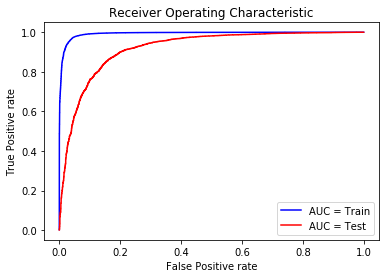

In [57]:
print("The most optimal value of c is %f" %(c))

clf = LogisticRegression(random_state=0,penalty='l2',C=c)
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
acc = accuracy_score(y_test, pred_test, normalize=True) * float(100)

print('\nTest accuracy for c = %f is %f%%' % (c, acc))
roc_score_test = roc_auc_score(y_test,pred_test)
print('\n Test ROC Score is ',roc_score_test)
fpr1, tpr1, thresholds1 = roc_curve(y_train, clf.predict_proba(X_train)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
x.add_row(['BOW','Logistic Regression',c,acc,roc_score_test])
plt.figure()
plt.title("Receiver Operating Characteristic")
plt.plot(fpr1, tpr1, 'b', label = 'AUC = Train')
plt.plot(fpr2, tpr2, 'r', label = 'AUC = Test')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()
plt.show()



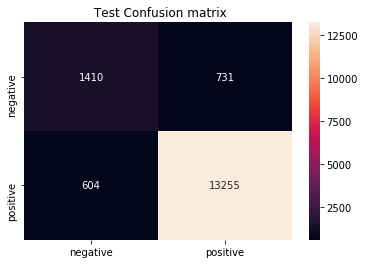

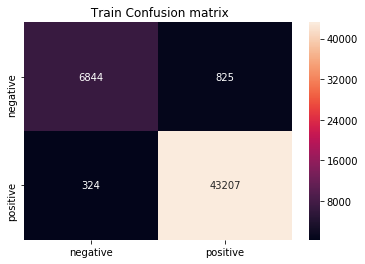

In [58]:
#Confusion Matrix
cm=confusion_matrix(y_test,pred_test)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title(" Test Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

cm2=confusion_matrix(y_train,pred_train)
df_cm = pd.DataFrame(cm2,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title(" Train Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

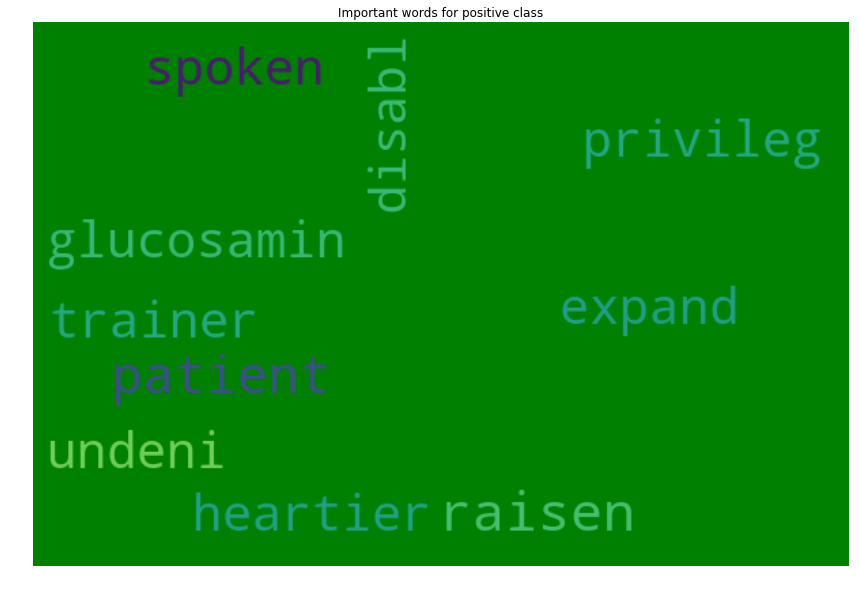

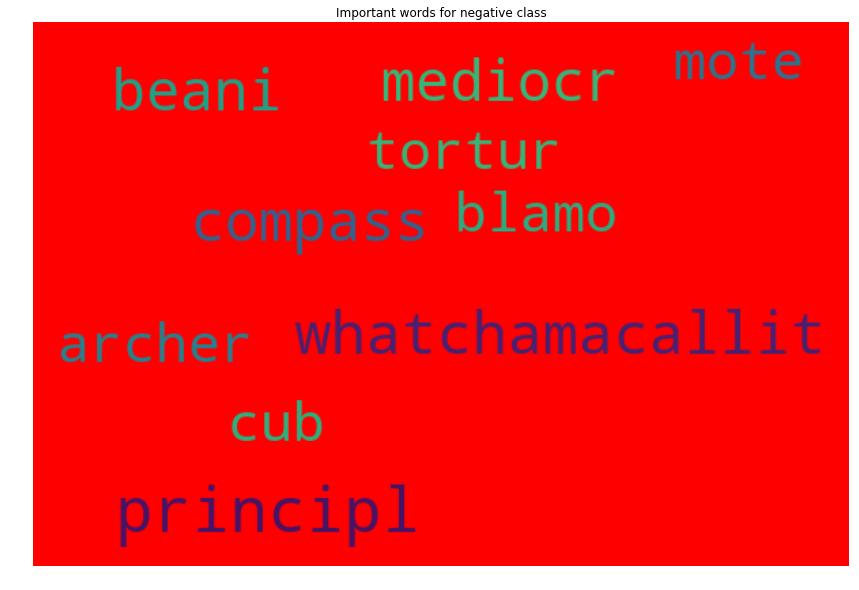

In [38]:
#Printing Important features
dictnegative={}
dictpositive={}
coefs_with_fns = sorted(zip(clf.coef_[0], feature))
top = zip(coefs_with_fns[:10], coefs_with_fns[:-(10 + 1):-1])
for (coef_1, fn_1), (coef_2, fn_2) in top:
    dictnegative[fn_1]=coef_1
    dictpositive[fn_2]=coef_2
wc=wordcloud.WordCloud(width=600, height=400,max_font_size=40,background_color="green", max_words=1000)

wc.generate_from_frequencies(dictpositive)
plt.figure( figsize=(20,10) )
plt.title("Important words for positive class")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc=wordcloud.WordCloud(width=600, height=400,max_font_size=40,background_color="red", max_words=1000)
wc.generate_from_frequencies(dictnegative)
plt.figure( figsize=(20,10) )
plt.title("Important words for negative class")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


### Logistic Regression with TFIDF

In [59]:
import warnings
warnings.filterwarnings("ignore")
#Vectorizing using TFIDF
#TF IDF Vectorizing


trainX_data=final['CleanedText'].values[0:46400]
testX_data= final['CleanedText'].values[58000:70000]
cvX_data=final['CleanedText'].values[46400:58000]
trainY_data=final['Score'].values[0:46400]
testY_data=final['Score'].values[58000:70000]
cvY_data=final['Score'].values[46400:58000]


tf_idf_vect = TfidfVectorizer(max_features=2000,min_df=50)
final_tf_idf_train = tf_idf_vect.fit_transform(trainX_data)

feature=tf_idf_vect.get_feature_names()

    
final_tf_idf_test=tf_idf_vect.transform(testX_data)
 

final_tf_idf_cv=tf_idf_vect.transform(cvX_data)


In [60]:
import warnings
warnings.filterwarnings("ignore")
X_train=final_tf_idf_train
X_test =final_tf_idf_test
X_cv=final_tf_idf_cv
y_train=trainY_data
y_test=testY_data
y_cv=cvY_data

In [61]:
z = {'positive': 1, 'negative': 0}
y_train = pd.Series(y_train)
y_cv = pd.Series(y_cv)
y_test = pd.Series(y_test)
y_train=y_train.map(z)
y_cv = y_cv.map(z)
y_test = y_test.map(z)

In [62]:
#Hyperparameter range
clist=[0.001, 0.01, 0.1, 1, 10, 100, 1000]



CV accuracy for c = 0.001000 is 86.112069%

CV accuracy for c = 0.010000 is 86.112069%

CV accuracy for c = 0.100000 is 88.956897%

CV accuracy for c = 1.000000 is 92.431034%

CV accuracy for c = 10.000000 is 92.525862%

CV accuracy for c = 100.000000 is 92.448276%

CV accuracy for c = 1000.000000 is 92.422414%


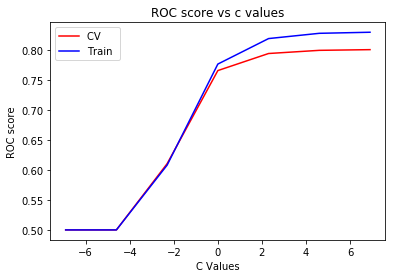

In [63]:
#Running Logistic Regression
c = 0
roc_sc = 0.0
roc_list_cv = []
roc_list_train = []
for i in clist:
    clf = LogisticRegression(random_state=0,penalty='l2',C=i)
    clf.fit(X_train, y_train)
    pred_train = clf.predict(X_train)
    pred_cv = clf.predict(X_cv)
    roc_score_train = roc_auc_score(y_train,pred_train)
    roc_score_cv = roc_auc_score(y_cv, pred_cv)
    roc_list_cv.append(roc_score_cv)
    roc_list_train.append(roc_score_train)
    acc = accuracy_score(y_cv, pred_cv, normalize=True) * float(100)
    print('\nCV accuracy for c = %f is %f%%' % (i, acc))
    if (roc_sc<=roc_score_cv):
        roc_sc=roc_score_cv
        c=i
    else:
        pass

clist1 = [math.log(i) for i in clist]
plt.figure()
plt.plot(clist1,roc_list_cv,'r',label='CV ')
plt.plot(clist1,roc_list_train,'b',label='Train ')
plt.title("ROC score vs c values")
plt.xlabel("C Values")
plt.ylabel("ROC score")
plt.legend()
plt.show()    

The most optimal value of c is 1000.000000

Test accuracy for c = 1000.000000 is 91.983333%

 Test ROC Score is  0.8067697164138083


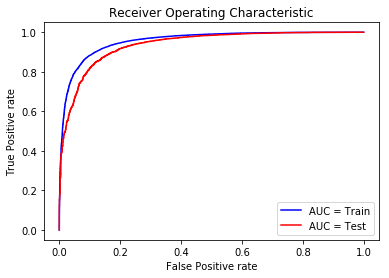

In [64]:
print("The most optimal value of c is %f" %(c))

clf = LogisticRegression(random_state=0,penalty='l2',C=c)
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
acc = accuracy_score(y_test, pred_test, normalize=True) * float(100)

print('\nTest accuracy for c = %f is %f%%' % (c, acc))
roc_score_test = roc_auc_score(y_test,pred_test)
print('\n Test ROC Score is ',roc_score_test)
fpr1, tpr1, thresholds1 = roc_curve(y_train, clf.predict_proba(X_train)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
x.add_row(['TFIDF','Logistic Regression',c,acc,roc_score_test])
plt.figure()
plt.title("Receiver Operating Characteristic")
plt.plot(fpr1, tpr1, 'b', label = 'AUC = Train')
plt.plot(fpr2, tpr2, 'r', label = 'AUC = Test')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()
plt.show()



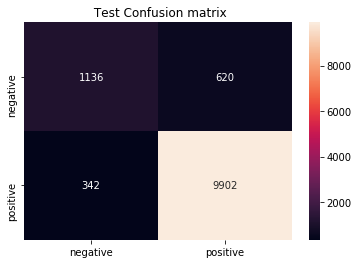

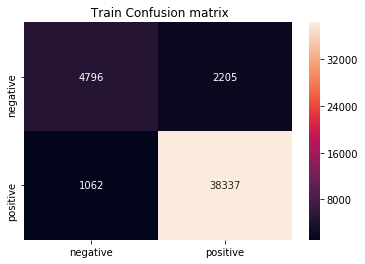

In [65]:
#Confusion Matrix
cm=confusion_matrix(y_test,pred_test)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title(" Test Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

cm2=confusion_matrix(y_train,pred_train)
df_cm = pd.DataFrame(cm2,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title(" Train Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

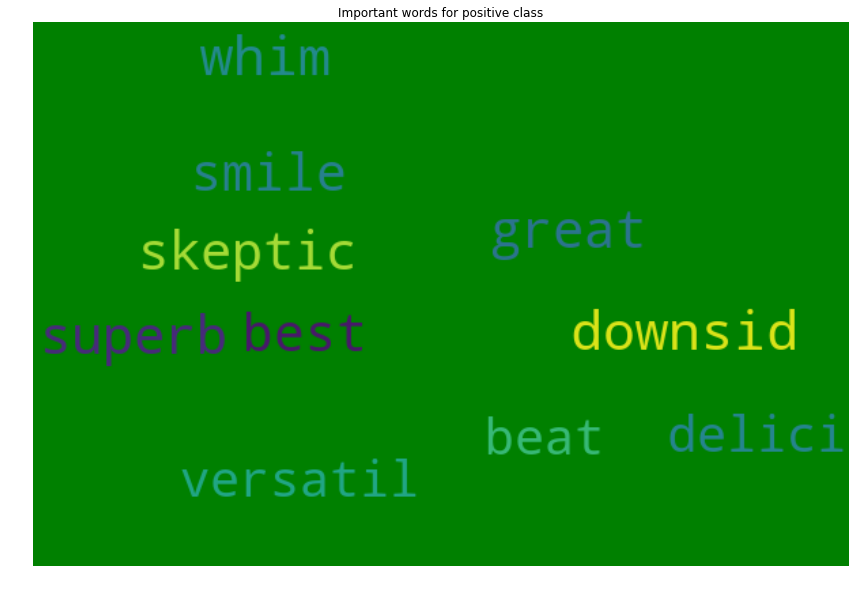

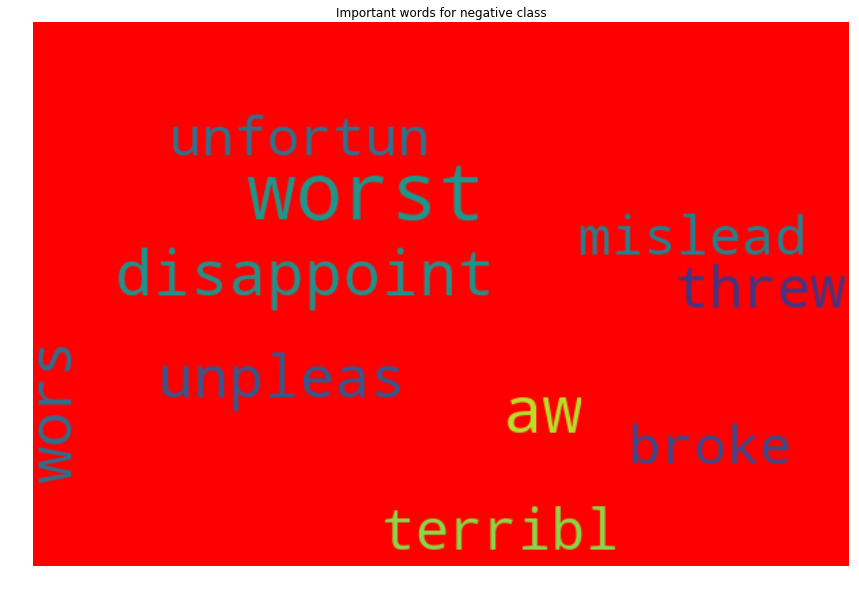

In [20]:
#Printing important features
dictnegative={}
dictpositive={}
coefs_with_fns = sorted(zip(clf.coef_[0], feature))
top = zip(coefs_with_fns[:10], coefs_with_fns[:-(10 + 1):-1])
for (coef_1, fn_1), (coef_2, fn_2) in top:
    dictnegative[fn_1]=coef_1
    dictpositive[fn_2]=coef_2
wc=wordcloud.WordCloud(width=600, height=400,max_font_size=40,background_color="green", max_words=1000)

wc.generate_from_frequencies(dictpositive)
plt.figure( figsize=(20,10) )
plt.title("Important words for positive class")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc=wordcloud.WordCloud(width=600, height=400,max_font_size=40,background_color="red", max_words=1000)
wc.generate_from_frequencies(dictnegative)
plt.figure( figsize=(20,10) )
plt.title("Important words for negative class")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


### Logistic Regression with AVG W2V

In [90]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovtrain = final['CleanedText'].values[0:51200]

i=0
list_of_sent=[]
for sent in datawtovtrain:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_train = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0;
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_train.append(sent_vec)
print(len(sent_vectors_train))
W2VScoretrain=final['Score'].values[0:51200]



number of words that occured minimum 5 times  9691
sample words  ['littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'grew', 'read', 'sendak', 'watch', 'realli', 'rosi', 'movi', 'incorpor', 'howev', 'miss', 'hard', 'cover', 'version', 'paperback', 'seem', 'kind', 'flimsi', 'take', 'two', 'hand']



51200


In [67]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovcv = final['CleanedText'].values[51200:64000]


i=0
list_of_sent=[]
for sent in datawtovcv:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_cv = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0;
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_cv.append(sent_vec)
print(len(sent_vectors_cv))
W2VScorecv=final['Score'].values[51200:64000]



number of words that occured minimum 5 times  4496
sample words  ['best', 'granola', 'bar', 'ever', 'plus', 'got', 'sale', 'made', 'even', 'better', 'get', 'children', 'eat', 'littl', 'bit', 'fiber', 'realli', 'good', 'cours', 'almond', 'mix', 'nut', 'flavor', 'would', 'give', 'five', 'star', 'found', 'like', 'roast', 'peanut', 'fantast', 'snack', 'sweet', 'crunchi', 'chewi', 'nutti', 'salti', 'usual', 'hate', 'love', 'fan', 'tri', 'recent', 'one', 'breakfast', 'minut', 'ago', 'matter', 'fact']



12800


In [68]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovtest = final['CleanedText'].values[64000:]

i=0
list_of_sent=[]
for sent in datawtovtest:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_test = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0;
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
W2VScoretest=final['Score'].values[64000:]


number of words that occured minimum 5 times  4917
sample words  ['tortellini', 'dri', 'graini', 'come', 'small', 'box', 'couldnt', 'eat', 'flavor', 'strong', 'good', 'end', 'donat', 'remain', 'bought', 'time', 'ago', 'amazon', 'back', 'davinci', 'tri', 'barilla', 'brand', 'find', 'quit', 'tasti', 'lack', 'filler', 'use', 'great', 'butter', 'grate', 'chees', 'various', 'sauc', 'make', 'yummi', 'italian', 'salad', 'cut', 'hard', 'salami', 'chunk', 'pickl', 'veggi', 'marin', 'artichok', 'oliv', 'love', 'eas']



16000


In [69]:
import warnings
warnings.filterwarnings("ignore")

#Train Test Split of W2V data
#creating the model with W2V and brute force KNN
X_train = sent_vectors_train
X_cv=sent_vectors_cv
X_test = sent_vectors_test
Y_train = W2VScoretrain
Y_cv = W2VScorecv
Y_test = W2VScoretest

In [70]:
z = {'positive': 1, 'negative': 0}
y_train = pd.Series(Y_train)
y_cv = pd.Series(Y_cv)
y_test = pd.Series(Y_test)
y_train=y_train.map(z)
y_cv = y_cv.map(z)
y_test = y_test.map(z)


In [71]:
#Hyperparameter range
clist=[0.001, 0.01, 0.1, 1, 10, 100, 1000]


 CV accuracy for c = 0.001000 is 84.203125%

 CV accuracy for c = 0.010000 is 77.226562%

 CV accuracy for c = 0.100000 is 69.273438%

 CV accuracy for c = 1.000000 is 63.546875%

 CV accuracy for c = 10.000000 is 62.132812%

 CV accuracy for c = 100.000000 is 61.976562%

 CV accuracy for c = 1000.000000 is 61.945313%


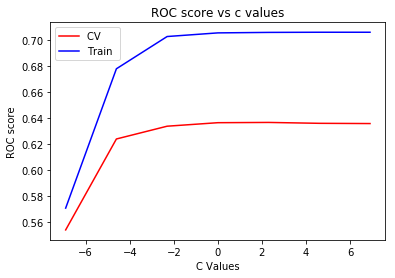

In [72]:
#Running Logistic Regression
c = 0
roc_sc = 0.0
roc_list_cv = []
roc_list_train = []
for i in clist:
    clf = LogisticRegression(random_state=0,penalty='l2',C=i)
    clf.fit(X_train, y_train)
    pred_train = clf.predict(X_train)
    pred_cv = clf.predict(X_cv)
    roc_score_train = roc_auc_score(y_train,pred_train)
    roc_score_cv = roc_auc_score(y_cv, pred_cv)
    roc_list_cv.append(roc_score_cv)
    roc_list_train.append(roc_score_train)
    acc = accuracy_score(y_cv, pred_cv, normalize=True) * float(100)
    print('\n CV accuracy for c = %f is %f%%' % (i, acc))
    if (roc_sc<=roc_score_cv):
        roc_sc=roc_score_cv
        c=i
    else:
        pass

clist1 = [math.log(i) for i in clist]
plt.figure()
plt.plot(clist1,roc_list_cv,'r',label='CV ')
plt.plot(clist1,roc_list_train,'b',label='Train ')
plt.title("ROC score vs c values")
plt.xlabel("C Values")
plt.ylabel("ROC score")
plt.legend()
plt.show()    

The most optimal value of c is 10.000000

Test accuracy for c = 10.000000 is 72.168750%

 Test ROC Score is  0.6247093272981279


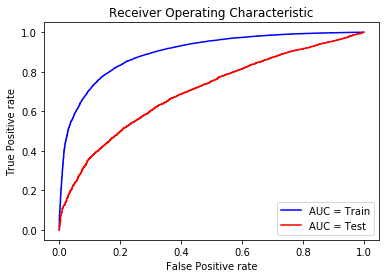

In [73]:
print("The most optimal value of c is %f" %(c))

clf = LogisticRegression(random_state=0,penalty='l2',C=c)
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
acc = accuracy_score(y_test, pred_test, normalize=True) * float(100)

print('\nTest accuracy for c = %f is %f%%' % (c, acc))
roc_score_test = roc_auc_score(y_test,pred_test)
print('\n Test ROC Score is ',roc_score_test)
fpr1, tpr1, thresholds1 = roc_curve(y_train, clf.predict_proba(X_train)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
x.add_row(['AVG W2V','Logistic Regression',c,acc,roc_score_test])
plt.figure()
plt.title("Receiver Operating Characteristic")
plt.plot(fpr1, tpr1, 'b', label = 'AUC = Train')
plt.plot(fpr2, tpr2, 'r', label = 'AUC = Test')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()
plt.show()



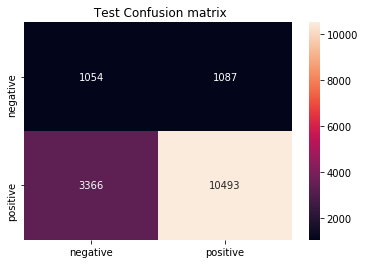

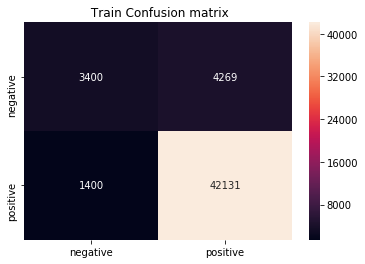

In [74]:
#Confusion Matrix
cm=confusion_matrix(y_test,pred_test)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title(" Test Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

cm2=confusion_matrix(y_train,pred_train)
df_cm = pd.DataFrame(cm2,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title(" Train Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

### Logistic Regression with TFIDF W2V

In [75]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovtrain = final['CleanedText'].values[0:51200]


i=0
list_of_sent=[]
for sent in datawtovtrain:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_train = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
    sent_vectors_train.append(sent_vec)
print(len(sent_vectors_train))
W2VScoretrain=final['Score'].values[0:51200]


number of words that occured minimum 5 times  9691
sample words  ['littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'grew', 'read', 'sendak', 'watch', 'realli', 'rosi', 'movi', 'incorpor', 'howev', 'miss', 'hard', 'cover', 'version', 'paperback', 'seem', 'kind', 'flimsi', 'take', 'two', 'hand']



51200


In [76]:
#TFIDF WEIGHTED W2V
import warnings
warnings.filterwarnings("ignore")

datatfidftrain = final['CleanedText'].values[0:51200]

model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(datatfidftrain)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [77]:
import warnings
warnings.filterwarnings("ignore")
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names


tfidf_sent_vectors_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]

            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_train.append(sent_vec)
    row += 1
TFIDFW2VScoretrain=final['Score'].values[0:51200]

In [78]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovcv = final['CleanedText'].values[51200:64000]
i=0
list_of_sent=[]
for sent in datawtovcv:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_cv = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
    sent_vectors_cv.append(sent_vec)
print(len(sent_vectors_cv))

W2VScorecv=final['Score'].values[51200:64000]

number of words that occured minimum 5 times  4496
sample words  ['best', 'granola', 'bar', 'ever', 'plus', 'got', 'sale', 'made', 'even', 'better', 'get', 'children', 'eat', 'littl', 'bit', 'fiber', 'realli', 'good', 'cours', 'almond', 'mix', 'nut', 'flavor', 'would', 'give', 'five', 'star', 'found', 'like', 'roast', 'peanut', 'fantast', 'snack', 'sweet', 'crunchi', 'chewi', 'nutti', 'salti', 'usual', 'hate', 'love', 'fan', 'tri', 'recent', 'one', 'breakfast', 'minut', 'ago', 'matter', 'fact']



12800


In [79]:
#TFIDF WEIGHTED W2V
import warnings
warnings.filterwarnings("ignore")

datatfidfcv = final['CleanedText'].values[51200:64000]

model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(datatfidfcv)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [80]:
import warnings
warnings.filterwarnings("ignore")
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names


tfidf_sent_vectors_cv = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_cv.append(sent_vec)
    row += 1
print(len(tfidf_sent_vectors_cv))
TFIDFW2VScorecv=final['Score'].values[51200:64000]


12800


In [81]:
import warnings
warnings.filterwarnings("ignore")
#Creating W2V model
#WORD TO VECTOR
datawtovtest = final['CleanedText'].values[64000:]

i=0
list_of_sent=[]
for sent in datawtovtest:
    list_of_sent.append(sent.split())
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

sent_vectors_test = []; 
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
W2VScoretest=final['Score'].values[64000:]



number of words that occured minimum 5 times  4917
sample words  ['tortellini', 'dri', 'graini', 'come', 'small', 'box', 'couldnt', 'eat', 'flavor', 'strong', 'good', 'end', 'donat', 'remain', 'bought', 'time', 'ago', 'amazon', 'back', 'davinci', 'tri', 'barilla', 'brand', 'find', 'quit', 'tasti', 'lack', 'filler', 'use', 'great', 'butter', 'grate', 'chees', 'various', 'sauc', 'make', 'yummi', 'italian', 'salad', 'cut', 'hard', 'salami', 'chunk', 'pickl', 'veggi', 'marin', 'artichok', 'oliv', 'love', 'eas']



16000


In [82]:
#TFIDF WEIGHTED W2V
import warnings
warnings.filterwarnings("ignore")

datatfidftest = final['CleanedText'].values[64000:]
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(datatfidftest)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [83]:
import warnings
warnings.filterwarnings("ignore")
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names


tfidf_sent_vectors_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_test.append(sent_vec)
    row += 1
TFIDFW2VScoretest=final['Score'].values[64000:]


In [84]:
import warnings
warnings.filterwarnings("ignore")
#Train Test Split of TFIDF W2V data
#creating the model with TFIDF W2V and brute force KNN
X_train = tfidf_sent_vectors_train
X_test = tfidf_sent_vectors_test
X_cv = tfidf_sent_vectors_cv
Y_train = TFIDFW2VScoretrain
Y_test = TFIDFW2VScoretest
Y_cv =TFIDFW2VScorecv

In [85]:
z = {'positive': 1, 'negative': 0}
y_train = pd.Series(Y_train)
y_cv = pd.Series(Y_cv)
y_test = pd.Series(Y_test)
y_train=y_train.map(z)
y_cv = y_cv.map(z)
y_test = y_test.map(z)

In [86]:
#Hyperparameter range
clist=[0.001, 0.01, 0.1, 1, 10, 100, 1000]



CV accuracy for c = 0.001000 is 85.414062%

CV accuracy for c = 0.010000 is 82.132812%

CV accuracy for c = 0.100000 is 73.890625%

CV accuracy for c = 1.000000 is 69.437500%

CV accuracy for c = 10.000000 is 68.867188%

CV accuracy for c = 100.000000 is 68.796875%

CV accuracy for c = 1000.000000 is 68.789062%


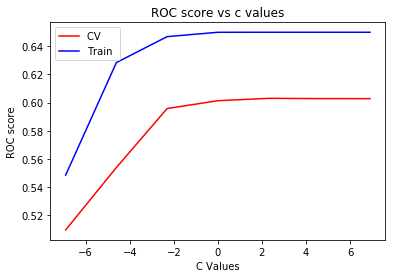

In [87]:
#Running Logistic Regression
c = 0
roc_sc = 0.0
roc_list_cv = []
roc_list_train = []
for i in clist:
    clf = LogisticRegression(random_state=0,penalty='l2',C=i)
    clf.fit(X_train, y_train)
    pred_train = clf.predict(X_train)
    pred_cv = clf.predict(X_cv)
    roc_score_train = roc_auc_score(y_train,pred_train)
    roc_score_cv = roc_auc_score(y_cv, pred_cv)
    roc_list_cv.append(roc_score_cv)
    roc_list_train.append(roc_score_train)
    acc = accuracy_score(y_cv, pred_cv, normalize=True) * float(100)
    print('\nCV accuracy for c = %f is %f%%' % (i, acc))
    if (roc_sc<=roc_score_cv):
        roc_sc=roc_score_cv
        c=i
    else:
        pass

clist1 = [math.log(i) for i in clist]
plt.figure()
plt.plot(clist1,roc_list_cv,'r',label='CV ')
plt.plot(clist1,roc_list_train,'b',label='Train ')
plt.title("ROC score vs c values")
plt.xlabel("C Values")
plt.ylabel("ROC score")
plt.legend()
plt.show()    

The most optimal value of c is 10.000000

Test accuracy for c = 10.000000 is 79.156250%

 Test ROC Score is  0.5854685167581055


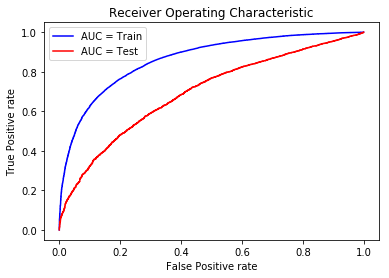

In [88]:
print("The most optimal value of c is %f" %(c))

clf = LogisticRegression(random_state=0,penalty='l2',C=c)
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
acc = accuracy_score(y_test, pred_test, normalize=True) * float(100)

print('\nTest accuracy for c = %f is %f%%' % (c, acc))
roc_score_test = roc_auc_score(y_test,pred_test)
print('\n Test ROC Score is ',roc_score_test)
fpr1, tpr1, thresholds1 = roc_curve(y_train, clf.predict_proba(X_train)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
x.add_row(['TFIDF W2V','Logistic Regression',c,acc,roc_score_test])
plt.figure()
plt.title("Receiver Operating Characteristic")
plt.plot(fpr1, tpr1, 'b', label = 'AUC = Train')
plt.plot(fpr2, tpr2, 'r', label = 'AUC = Test')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()
plt.show()



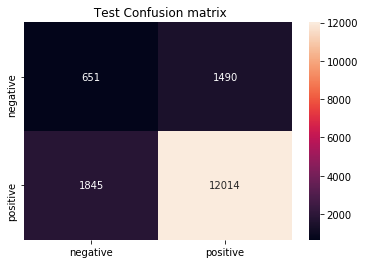

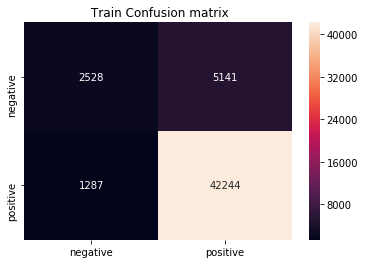

In [89]:
#Confusion Matrix
cm=confusion_matrix(y_test,pred_test)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title(" Test Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

cm2=confusion_matrix(y_train,pred_train)
df_cm = pd.DataFrame(cm2,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title(" Train Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

### Pertubartion Technique 

##### Using BOW

In [37]:
#Using BOW to vectorize

trainX_data=final['CleanedText'].values[0:51200]
testX_data= final['CleanedText'].values[64000:]
cvX_data=final['CleanedText'].values[51200:64000]
trainY_data=final['Score'].values[0:51200]
testY_data=final['Score'].values[64000:]
cvY_data=final['Score'].values[51200:64000]


#Vectorising train data
count_vect = CountVectorizer()
final_counts_train = count_vect.fit_transform(trainX_data)

feature=count_vect.get_feature_names()

#Vectorising cross validation data
final_counts_cv=count_vect.transform(cvX_data)

#Vectorising test data
final_counts_test=count_vect.transform(testX_data)


In [38]:
X_train=final_counts_train
X_test =final_counts_test
X_cv=final_counts_cv
y_train=trainY_data
y_test=testY_data
y_cv=cvY_data


In [39]:
z = {'positive': 1, 'negative': 0}
y_train = pd.Series(y_train)
y_cv = pd.Series(y_cv)
y_test = pd.Series(y_test)
y_train=y_train.map(z)
y_cv = y_cv.map(z)
y_test = y_test.map(z)

In [40]:
c=10
print("The most optimal value of c for BOW is %f" %(c))

clf = LogisticRegression(random_state=0,penalty='l2',C=c)
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
acc = accuracy_score(y_test, pred_test, normalize=True) * float(100)

print('\nTest accuracy for c = %f is %f%%' % (c, acc))

roc_score_test = roc_auc_score(y_test,pred_test)
print('\n Test ROC Score is ',roc_score_test)



The most optimal value of c for BOW is 10.000000

Test accuracy for c = 10.000000 is 91.656250%

 Test ROC Score is  0.807494486659345


In [41]:
w=clf.coef_[0]
print(w)
w=w+0.000001
print(w)

[ 0.00050194  0.00030695 -0.00029185 ...  0.07064135  0.24806647
  0.11286978]
[ 0.00050294  0.00030795 -0.00029085 ...  0.07064235  0.24806747
  0.11287078]


##### Adding 1 to the input dataset

In [42]:
X_train.data+=1
X_test.data+=1
X_cv.data+=1

In [43]:
c=10
print("The most optimal value of c for BOW is %f" %(c))

clf = LogisticRegression(random_state=0,penalty='l2',C=c)
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
acc = accuracy_score(y_test, pred_test, normalize=True) * float(100)

print('\nTest accuracy for c = %f is %f%%' % (c, acc))

roc_score_test = roc_auc_score(y_test,pred_test)
print('\n Test ROC Score is ',roc_score_test)



The most optimal value of c for BOW is 10.000000

Test accuracy for c = 10.000000 is 90.656250%

 Test ROC Score is  0.8003398577634444


In [44]:
wnew=clf.coef_[0]
print(wnew)
wnew=wnew+0.000001
print(wnew)

[ 8.32066868e-06  4.70668839e-06 -8.27072978e-03 ...  4.61750080e-04
  2.77067541e-01  6.62773087e-02]
[ 9.32066868e-06  5.70668839e-06 -8.26972978e-03 ...  4.62750080e-04
  2.77068541e-01  6.62783087e-02]


In [45]:
difference=(abs(abs(w-wnew)/w)*100)

In [46]:
print(len(difference))

28392


In [18]:
for i in range(0,101,10):
    print(i," th percentile is ", np.percentile(difference,i))

0  th percentile is  0.0025592027438779584
10  th percentile is  11.644612330699491
20  th percentile is  24.30600258039962
30  th percentile is  38.49039917053306
40  th percentile is  56.80001933931301
50  th percentile is  78.54567559771047
60  th percentile is  94.30040413912243
70  th percentile is  98.1118697236497
80  th percentile is  99.1375626891556
90  th percentile is  169.07645063624213
100  th percentile is  195686.0932067724


We can see a huge difference in percentile change from 90th to 100. So calculating percentiles between these.

In [20]:
for i in range(90,101):
    print(i," th percentile is ", np.percentile(difference,i))

90  th percentile is  169.07645063624213
91  th percentile is  189.67706701592846
92  th percentile is  212.66213046448223
93  th percentile is  246.06473902332021
94  th percentile is  289.81685909521923
95  th percentile is  359.24930982738215
96  th percentile is  447.90340146821393
97  th percentile is  607.34351815547
98  th percentile is  940.8111692556854
99  th percentile is  2033.2979253897206
100  th percentile is  195686.0932067724


In [23]:
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i," th percentile is ", np.percentile(difference,i))

99.1  th percentile is  2291.3315374867616
99.2  th percentile is  2479.766102508035
99.3  th percentile is  2743.2804451165493
99.4  th percentile is  3070.8455131149385
99.5  th percentile is  3675.210448448249
99.6  th percentile is  4450.550103190751
99.7  th percentile is  5863.433320191714
99.8  th percentile is  9699.300470775104
99.9  th percentile is  17985.52097487209
100  th percentile is  195686.0932067724


In [24]:
for i in [99.91,99.92,99.93,99.94,99.95,99.96,99.97,99.98,99.99,100]:
    print(i," th percentile is ", np.percentile(difference,i))

99.91  th percentile is  19213.14651947017
99.92  th percentile is  21485.10493048231
99.93  th percentile is  27636.219755937957
99.94  th percentile is  29819.437279844624
99.95  th percentile is  37075.08044785011
99.96  th percentile is  45120.98357519316
99.97  th percentile is  59031.15592902585
99.98  th percentile is  83586.97904299975
99.99  th percentile is  93082.51456188332
100  th percentile is  195686.0932067724


We can see that there is huge difference between 99.99th percentile and 100th percentile.

In [47]:
diffwithfeat = sorted(zip(difference, feature))

In [48]:
dictfeat={}
for (diff, feat) in diffwithfeat:
    if diff>2.5:
        dictfeat[feat]=diff

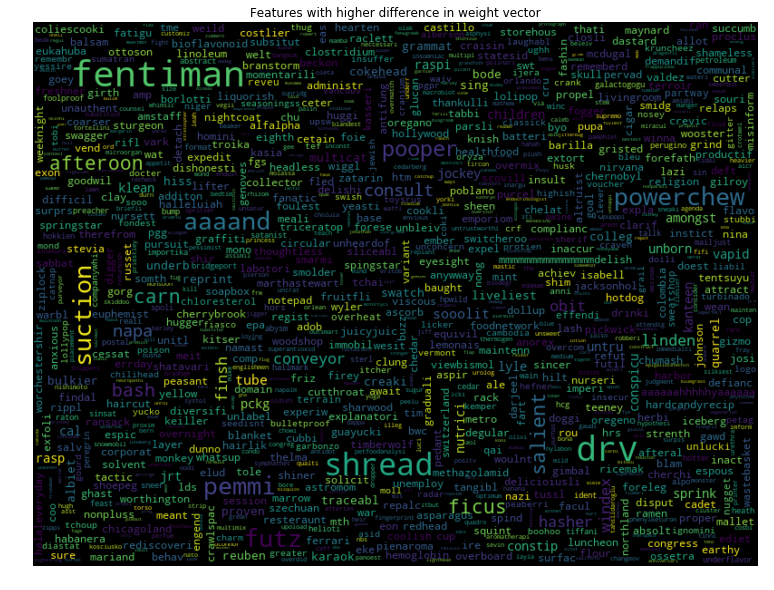

In [49]:
wc=wordcloud.WordCloud(width=800, height=600,max_font_size=40,background_color="black", max_words=1000)

wc.generate_from_frequencies(dictfeat)
plt.figure( figsize=(20,10) )
plt.title("Features with higher difference in weight vector")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

### Sparcity Due to Use of L1 regularizer

In [156]:
#Using BOW to vectorize

trainX_data=final['CleanedText'].values[0:51200]
testX_data= final['CleanedText'].values[64000:]
cvX_data=final['CleanedText'].values[51200:64000]
trainY_data=final['Score'].values[0:51200]
testY_data=final['Score'].values[64000:]
cvY_data=final['Score'].values[51200:64000]


#Vectorising train data
count_vect = CountVectorizer()
final_counts_train = count_vect.fit_transform(trainX_data)

feature=count_vect.get_feature_names()

#Vectorising cross validation data
final_counts_cv=count_vect.transform(cvX_data)

#Vectorising test data
final_counts_test=count_vect.transform(testX_data)


In [157]:
X_train=final_counts_train
X_test =final_counts_test
X_cv=final_counts_cv
y_train=trainY_data
y_test=testY_data
y_cv=cvY_data


In [158]:
z = {'positive': 1, 'negative': 0}
y_train = pd.Series(y_train)
y_cv = pd.Series(y_cv)
y_test = pd.Series(y_test)
y_train=y_train.map(z)
y_cv = y_cv.map(z)
y_test = y_test.map(z)

In [159]:
c=10
print("The most optimal value of c for BOW is %f" %(c))

clf = LogisticRegression(random_state=0,penalty='l1',C=c)
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
acc = accuracy_score(y_test, pred_test, normalize=True) * float(100)

print('\nTest accuracy for c = %f is %f%%' % (c, acc))

roc_score_test = roc_auc_score(y_test,pred_test)
print('\n Test ROC Score is ',roc_score_test)



The most optimal value of c for BOW is 10.000000

Test accuracy for c = 10.000000 is 90.525000%

 Test ROC Score is  0.8001746016184419


In [161]:
wl1=clf.coef_[0]

In [163]:
cnt=0
for i in wl1:
    if i==0:
        cnt+=1
print("Number of zeroed feature weights are : ",cnt)

Number of zeroed feature weights are :  20524


In [166]:
percentsparse=(cnt/len(wl1))*100

In [176]:
print("The use of L1 regularizer made the weight vector %.5f percent sparse"%(percentsparse))

The use of L1 regularizer made the weight vector 72.28797 percent sparse


### Feature Engineering

As a part of feature engineering I am adding two new feature i.e the count of positive words in a review and count of negative.

Steps:

1. Train with normal dataset

2. Get postitive and negative features.

3. Count number of positive and negative features in each review.

4. Add these two features to the dataset to create new dataset.

5. Train the model with this dataset.

In [8]:
#Using BOW to vectorize

trainX_data=final['CleanedText'].values[0:35000]
testX_data= final['CleanedText'].values[40000:50000]
cvX_data=final['CleanedText'].values[35000:40000]
trainY_data=final['Score'].values[0:35000]
testY_data=final['Score'].values[40000:50000]
cvY_data=final['Score'].values[35000:40000]



#Vectorising train data
count_vect = CountVectorizer()
final_counts_train = count_vect.fit_transform(trainX_data)

feature=count_vect.get_feature_names()

#Vectorising cross validation data
final_counts_cv=count_vect.transform(cvX_data)

#Vectorising test data
final_counts_test=count_vect.transform(testX_data)


In [9]:
X_train=final_counts_train
X_test =final_counts_test
X_cv=final_counts_cv
y_train=trainY_data
y_test=testY_data
y_cv=cvY_data


In [10]:
z = {'positive': 1, 'negative': 0}
y_train = pd.Series(y_train)
y_cv = pd.Series(y_cv)
y_test = pd.Series(y_test)
y_train=y_train.map(z)
y_cv = y_cv.map(z)
y_test = y_test.map(z)

In [11]:
c=10
print("The most optimal value of c for BOW is %f" %(c))

clf = LogisticRegression(random_state=0,penalty='l2',C=c)
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
acc = accuracy_score(y_test, pred_test, normalize=True) * float(100)

print('\nTest accuracy for c = %f is %f%%' % (c, acc))

roc_score_test = roc_auc_score(y_test,pred_test)
print('\n Test ROC Score is ',roc_score_test)



The most optimal value of c for BOW is 10.000000

Test accuracy for c = 10.000000 is 91.330000%

 Test ROC Score is  0.7705459764048912


In [12]:
#taking positive and negative features
dictnegative={}
dictpositive={}
listpos=[]
listneg=[]
coefs_with_fns = sorted(zip(clf.coef_[0], feature))
for (coef_1, fn_1) in coefs_with_fns:
    if (coef_1>0):
        listpos.append(fn_1)
    elif (coef_1<0):
        listneg.append(fn_1)
    else:
        print("The feature weight is zero hence it is neutral.")

In [13]:
print("Number of positive features ",len(listpos))
print("Number of negative features ",len(listneg))

Number of positive features  17806
Number of negative features  7211


In [14]:
#creating training data
xpostrain=[]
xnegtrain=[]
cntpost=0
cntneg=0
for i in tqdm(trainX_data):
    cntpost=0
    cntneg=0
    for j in i.split():
        if j in listpos:
            cntpost+=1
        elif j in listneg:
            cntneg+=1
        else:
            pass
    xpostrain.append(cntpost) 
    xnegtrain.append(cntneg)


In [15]:
X_train.shape

(35000, 25017)

In [16]:
X1 = pd.DataFrame(X_train.todense(), columns = feature)
X1['Positive'] = xpostrain
X1['Negative'] = xnegtrain

In [17]:
X_train_feat = sparse.csr_matrix(X1.values) #train data

In [18]:
print(X_train_feat.shape)
print(X_train.shape)

(35000, 25019)
(35000, 25017)


In [19]:
#cv data
xposcv=[]
xnegcv=[]
cntpost=0
cntneg=0
for i in tqdm(cvX_data):
    cntpost=0
    cntneg=0
    for j in i.split():
        if j in listpos:
            cntpost+=1
        elif j in listneg:
            cntneg+=1
        else:
            pass
    xposcv.append(cntpost) 
    xnegcv.append(cntneg)


In [20]:
X2 = pd.DataFrame(X_cv.todense(), columns = feature)
X2['Positive'] = xposcv
X2['Negative'] = xnegcv
X_cv_feat=sparse.csr_matrix(X2.values)

In [21]:
print(X_cv_feat.shape)
print(X_cv.shape)

(5000, 25019)
(5000, 25017)


In [22]:
#test dataset
xpostest=[]
xnegtest=[]
cntpost=0
cntneg=0
for i in tqdm(testX_data):
    cntpost=0
    cntneg=0
    for j in i.split():
        if j in listpos:
            cntpost+=1
        elif j in listneg:
            cntneg+=1
        else:
            pass
    xpostest.append(cntpost) 
    xnegtest.append(cntneg)


In [23]:
X3 = pd.DataFrame(X_test.todense(), columns = feature)
X3['Positive'] = xpostest
X3['Negative'] = xnegtest
X_test_feat=sparse.csr_matrix(X3.values)


In [24]:
print(X_test_feat.shape)
print(X_test.shape)

(10000, 25019)
(10000, 25017)


In [25]:
clist=[0.001, 0.01, 0.1, 1, 10, 100, 1000]



CV accuracy for c = 0.001000 is 88.740000%

CV accuracy for c = 0.010000 is 90.080000%

CV accuracy for c = 0.100000 is 90.860000%

CV accuracy for c = 1.000000 is 90.500000%

CV accuracy for c = 10.000000 is 89.560000%

CV accuracy for c = 100.000000 is 88.640000%

CV accuracy for c = 1000.000000 is 88.040000%


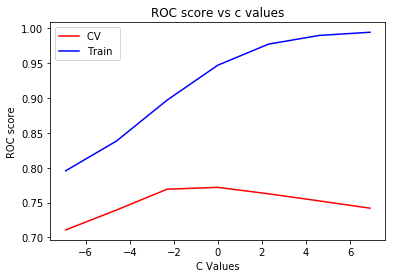

In [26]:
#Running Logistic Regression of new dataset
c = 0
roc_sc = 0.0
roc_list_cv = []
roc_list_train = []
for i in clist:
    clf = LogisticRegression(random_state=0,penalty='l2',C=i)
    clf.fit(X_train_feat, y_train)
    pred_train = clf.predict(X_train_feat)
    pred_cv = clf.predict(X_cv_feat)
    roc_score_train = roc_auc_score(y_train,pred_train)
    roc_score_cv = roc_auc_score(y_cv, pred_cv)
    roc_list_cv.append(roc_score_cv)
    roc_list_train.append(roc_score_train)
    acc = accuracy_score(y_cv, pred_cv, normalize=True) * float(100)
    print('\nCV accuracy for c = %f is %f%%' % (i, acc))
    if (roc_sc<=roc_score_cv):
        roc_sc=roc_score_cv
        c=i
    else:
        pass

clist1 = [math.log(i) for i in clist]
plt.figure()
plt.plot(clist1,roc_list_cv,'r',label='CV ')
plt.plot(clist1,roc_list_train,'b',label='Train ')
plt.title("ROC score vs c values")
plt.xlabel("C Values")
plt.ylabel("ROC score")
plt.legend()
plt.show()    

The most optimal value of c is 1.000000

Test accuracy for c = 1.000000 is 90.620000%

 Test ROC Score is  0.7554206405834181


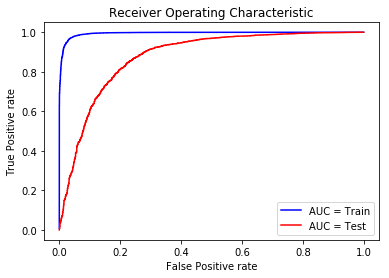

In [29]:
print("The most optimal value of c is %f" %(c))

clf = LogisticRegression(random_state=0,penalty='l2',C=c)
clf.fit(X_train_feat, y_train)
pred_train = clf.predict(X_train_feat)
pred_test = clf.predict(X_test_feat)
acc = accuracy_score(y_test, pred_test, normalize=True) * float(100)

print('\nTest accuracy for c = %f is %f%%' % (c, acc))
roc_score_test = roc_auc_score(y_test,pred_test)
print('\n Test ROC Score is ',roc_score_test)
fpr1, tpr1, thresholds1 = roc_curve(y_train, clf.predict_proba(X_train_feat)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, clf.predict_proba(X_test_feat)[:,1])
x.add_row(['BOW Extra Features','Logistic Regression',c,acc,roc_score_test])
plt.figure()
plt.title("Receiver Operating Characteristic")
plt.plot(fpr1, tpr1, 'b', label = 'AUC = Train')
plt.plot(fpr2, tpr2, 'r', label = 'AUC = Test')
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.legend()
plt.show()



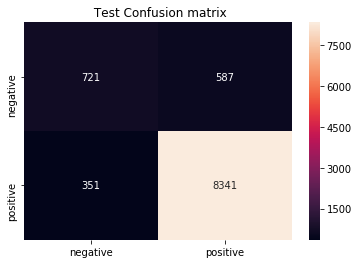

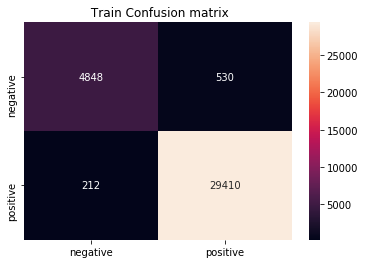

In [31]:
#Confusion Matrix
cm=confusion_matrix(y_test,pred_test)
df_cm = pd.DataFrame(cm,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title(" Test Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

cm2=confusion_matrix(y_train,pred_train)
df_cm = pd.DataFrame(cm2,index=["negative","positive"],columns=["negative","positive"])
plt.figure()
plt.title(" Train Confusion matrix")
sns.heatmap(df_cm, annot=True,fmt="d")

#### Results with feature engineered dataset

In [30]:
print(x)

+--------------------------+---------------------+---+----------+--------------------+
| Vectorizer/Featurization |        Model        | C | Accuracy |     ROC Score      |
+--------------------------+---------------------+---+----------+--------------------+
|    BOW Extra Features    | Logistic Regression | 1 |  90.62   | 0.7554206405834181 |
+--------------------------+---------------------+---+----------+--------------------+


## Conclusion

In [91]:
print(x)

+--------------------------+---------------------+------+-------------------+--------------------+
| Vectorizer/Featurization |        Model        |  C   |      Accuracy     |     ROC Score      |
+--------------------------+---------------------+------+-------------------+--------------------+
|           BOW            | Logistic Regression |  10  |      91.65625     | 0.807494486659345  |
|          TFIDF           | Logistic Regression | 1000 | 91.98333333333333 | 0.8067697164138083 |
|         AVG W2V          | Logistic Regression |  10  |      72.16875     | 0.6247093272981279 |
|        TFIDF W2V         | Logistic Regression |  10  |      79.15625     | 0.5854685167581055 |
+--------------------------+---------------------+------+-------------------+--------------------+


Note: Could not exactly compare the effects of new features as had to train with less dataset due to system constraints. But still with 5/8 th data also it performed pretty well compared to normal dataset.

Thanks Madhusudan !